In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

KeyboardInterrupt: 

1. Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

**2. The data**

In [2]:
data = pd.read_csv('kickstarter201801.csv')
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Data: 
******y: state (failed, canceled, succesful, live, suspended, etc ..)

X:

ID: project identifier

name: project name

category: sub-category of the project

main_category: project category

currency: currency of the request.

deadline: project expiration date

goal: money to be obtained in the project

launched: project start date

pledged: money requested by the community

backers: number of money donors

country: country of origin of the project

usd_pledged: conversion of pledged column into dollars

usd_pledged_real: dollar conversion of pledged column by Fixer.io API

usd_goal_real: dollar conversion of goal column by Fixer.io API


Cleaninig the data

In [5]:
X=data
X[X.state!='live']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,17/10/2014,50000.0,17/09/2014 02:35,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,19/07/2011,1500.0,22/06/2011 03:35,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,16/08/2010,15000.0,01/07/2010 19:40,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,13/02/2016,15000.0,13/01/2016 18:13,200.0,failed,6,US,200.0,200.0,15000.00


In [6]:

X=X[X.state!='live']
X=X.rename({'usd pledged': 'usd_pledged'}, axis=1)
X=X.drop(['name',"ID"],axis=1)


In [7]:
#Preparing  data Objects and Numbers
X_object = X.select_dtypes(include=object)
X_num = X.select_dtypes(include=np.number)

In [8]:
dummies = pd.get_dummies(X.main_category, prefix="main_category")
X = X.drop('main_category',axis = 1)
X = X.join(dummies)
dummies = pd.get_dummies(X.category, prefix="category")
X = X.drop('category',axis = 1)
X = X.join(dummies)
dummies = pd.get_dummies(X.country, prefix="country")
X = X.drop('country',axis = 1)
X = X.join(dummies)

Create duration

In [19]:
X

,backers,usd_pledged_realised at deadline,usd_goal_real_at_start,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,duration
0,0,0.0,1533.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,58
1,15,2421.0,30000.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,59
2,3,220.0,45000.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,44
3,1,1.0,5000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29
4,14,1283.0,19500.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,1,25.0,50000.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,29
378657,5,155.0,1500.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,26
378658,1,20.0,15000.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,45
378659,6,200.0,15000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,30


In [9]:
from datetime import timedelta
from datetime import datetime 
import datetime as dt
tiempo = np.array(X['deadline'])
endtime=np.array([datetime.strptime(t, '%d/%m/%Y') for t in tiempo ])
X['deadline']=endtime
tiempo = np.array(X['launched'])
starttime=np.array([datetime.strptime(t, '%d/%m/%Y %H:%M') for t in tiempo])
X['launched']=starttime
X['duration'] = (endtime-starttime)

In [10]:
tiempo =X['duration']
duration=np.array([t.days for t in tiempo])


In [11]:
X['duration']=duration
X = X.drop('deadline',axis = 1)
X = X.drop('launched',axis = 1)

In [12]:
def missing_data(data):
#source>
#https://www.kaggle.com/ajaykgp12/ecommerce-eda/notebook

        test = data.isnull().sum()
        total = test.sort_values(ascending = False)
        percent= (data.isnull().sum() * 100 / data.isnull().count() ).sort_values(ascending = False)
        df = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    
        return df[df['Total'] != 0]

missing_data(X)


,Total,Percent
usd_pledged,3796,1.009945


Clean redundant and duplicate data by definition.

goal: money to be obtained in the project pledged: money requested by the community

currency: currency of the request.

backers: number of money donors

usd_pledged: conversion of pledged column into dollars

usd_pledged_real: dollar conversion of pledged column by Fixer.io API

usd_goal_real: dollar conversion of goal column by Fixer.io API

deadline: project expiration date launched: project start date

In [13]:
#realmente no se puede predecir muy bien
X = X.drop(['usd_pledged'], axis =1)
X = X.drop(['goal','pledged','currency'],axis = 1)

In [14]:
y=X.state
y=y.replace(['canceled','suspended','undefined'],'failed')
   
X=X.drop("state",axis=1)
   

In [15]:
#definition of data later we do cross validation.
from sklearn.model_selection import train_test_split
# Test-train split. Consider a test set of (+ -) 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model with Naive Bayes Gaussian to predict the status of the project.

In [16]:
#y= pd.get_dummies(y)

#y=y.drop('failed',axis=1)


In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

y_prima = model.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_prima))

Accuracy: 0.7421137115440896


In [18]:
# 10-k-fold CV
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)

print("CV:",scores)
print("Accuracy:",scores.mean())

CV: [0.74137335 0.73820736 0.74163252 0.74392061 0.75525462 0.74227106
 0.74008939 0.74368116 0.73907838 0.74160592]
Accuracy: 0.7427114362243759


              precision    recall  f1-score   support

      failed       0.72      0.99      0.83     72634
  successful       0.92      0.30      0.45     40125

    accuracy                           0.74    112759
   macro avg       0.82      0.64      0.64    112759
weighted avg       0.79      0.74      0.70    112759

Acc: 0.7421137115440896


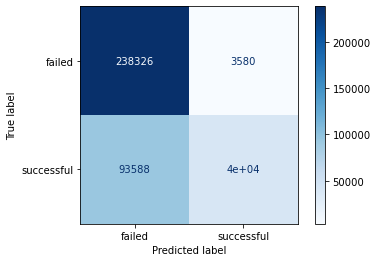

In [ ]:
class_names = (model.classes_)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prima, target_names=class_names))
from sklearn.metrics import accuracy_score
print("Acc:",accuracy_score(y_test, y_prima))

from sklearn.metrics import plot_confusion_matrix

 
plot_confusion_matrix(model, X,y,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)

# KNN model to predict project status.

In [20]:
X_train

,backers,usd_pledged_realised at deadline,usd_goal_real_at_start,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,duration
190683,28,1042.00,5000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,44
175672,2,50.00,15000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13
204005,1667,525890.00,100000.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,59
112897,8,883.78,825.45,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
75412,23,3620.62,3549.62,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261090,1,50.00,5000.00,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29
368546,42,1426.00,1000.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20
132924,4,161.00,3000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,34
147959,1,70.00,9000.00,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,59


In [21]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
k=[1, 3, 5, 7, 9]
preds_kNN=[]



In [ ]:
for i in range(len(k)):
    kNN=(KNeighborsClassifier(n_neighbors=k[i]).fit(X_train, y_train))
    # Lo evaluamos contra el grid de posiciones generadas anteriormente
    preds_kNN.append(kNN.predict(X_test))
    error_rate.append(np.mean(kNN.predict(X_test) != y_test))


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(k,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
kNN=(KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train))

In [ ]:
# 10-k-fold CV
scores = cross_val_score(kNN, X_test, y_test, cv=10)

#print("CV:",scores)
print("Accuracy:",scores.mean())

Accuracy: 0.9926835096655651


              precision    recall  f1-score   support

      failed       1.00      0.99      1.00    241906
  successful       0.99      1.00      0.99    133956

    accuracy                           0.99    375862
   macro avg       0.99      1.00      0.99    375862
weighted avg       0.99      0.99      0.99    375862

Acc: 0.9948332100611395


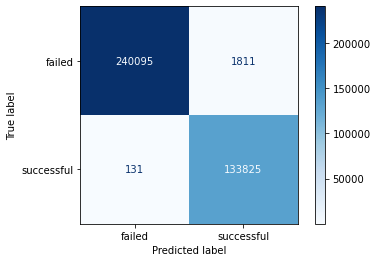

In [ ]:
class_names = (kNN.classes_)
y_prima =(kNN.predict(X))
from sklearn.metrics import classification_report
print(classification_report(y, y_prima, target_names=class_names))
from sklearn.metrics import accuracy_score
print("Acc:",accuracy_score(y, y_prima))

from sklearn.metrics import plot_confusion_matrix

 
plot_confusion_matrix(kNN, X,y,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)
# lo evaluamos contra los mismos datos de entrada
print((model.predict(X_test) == y_test).sum(), ' / ', y_test.shape[0], ' clasificados correctamente en aprendizaje')


109736  /  112759  clasificados correctamente en aprendizaje


In [ ]:
y_prima = model.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_prima))

Accuracy: 0.973190610062168


In [ ]:
# 10-k-fold CV
scores = cross_val_score(model, X, y, cv=10)

#print("CV:",scores)
print("Accuracy:",scores.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.9756240495356436


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

      failed       0.99      0.97      0.98     72634
  successful       0.95      0.98      0.96     40125

    accuracy                           0.97    112759
   macro avg       0.97      0.97      0.97    112759
weighted avg       0.97      0.97      0.97    112759

Acc: 0.973190610062168


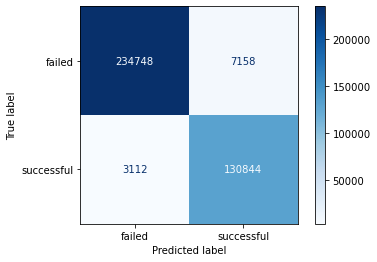

In [ ]:
class_names = (model.classes_)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prima, target_names=class_names))
from sklearn.metrics import accuracy_score
print("Acc:",accuracy_score(y_test, y_prima))

from sklearn.metrics import plot_confusion_matrix

 
plot_confusion_matrix(model, X,y,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)